In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
import seaborn as sns
%matplotlib inline

In [68]:
df = pd.read_csv('no show only numeric.csv')

In [69]:
df.head()

,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,...,"('SÃO CRISTÓVÃO',)","('SÃO JOSÉ',)","('SÃO PEDRO',)","('TABUAZEIRO',)","('UNIVERSITÁRIO',)","('VILA RUBIM',)",SD_date,days_between,days in week range,age_after_cut
0,0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-29 00:00:00+00:00,0,1.0,60
1,1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-29 00:00:00+00:00,0,1.0,50
2,2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-29 00:00:00+00:00,0,1.0,60
3,3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-29 00:00:00+00:00,0,1.0,10
4,4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-29 00:00:00+00:00,0,1.0,50


Summary after Data Visualization
- Age less than 0 and more than 100 should be drop
- days between where appoitment was earlier than schedule should be drop
- Unnamed:0 can be drop
- Appoitment ID is unique and can be use in index

Data for split 
- we should avoid that we have the same person in train and test
- comparision for diffrent train and test


In [70]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,"('SÃO CRISTÓVÃO',)","('SÃO JOSÉ',)","('SÃO PEDRO',)","('TABUAZEIRO',)","('UNIVERSITÁRIO',)","('VILA RUBIM',)",SD_date,days_between,days in week range,age_after_cut
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-29 00:00:00+00:00,0,1.0,60
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-29 00:00:00+00:00,0,1.0,50
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-29 00:00:00+00:00,0,1.0,60
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-29 00:00:00+00:00,0,1.0,10
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-29 00:00:00+00:00,0,1.0,50


In [71]:
#here we drop NaN values. We had 39 NaN in days_between column. We droped this rows with NaN
df= df.dropna()

In [72]:
df[df.Age>100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,"('SÃO CRISTÓVÃO',)","('SÃO JOSÉ',)","('SÃO PEDRO',)","('TABUAZEIRO',)","('UNIVERSITÁRIO',)","('VILA RUBIM',)",SD_date,days_between,days in week range,age_after_cut
58014,9.762948e+14,5651757,0,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-05-03 00:00:00+00:00,0,1.0,120
63912,3.196321e+13,5700278,0,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-05-16 00:00:00+00:00,3,1.0,120
63915,3.196321e+13,5700279,0,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-05-16 00:00:00+00:00,3,1.0,120
68127,3.196321e+13,5562812,0,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-08 00:00:00+00:00,38,12.0,120
76284,3.196321e+13,5744037,0,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-05-30 00:00:00+00:00,0,1.0,120
90372,2.342836e+11,5751563,0,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2016-05-31 00:00:00+00:00,2,1.0,120
97666,7.482346e+14,5717451,0,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,2016-05-19 00:00:00+00:00,15,4.0,120


In [73]:
# we tahe only data where the patient was younger than 100 years old, because we don't have enough data to predict for people older than 100
df = df[df.Age<100]
df = df[df.Age>0]

## Split train/test



In [74]:
target = df['No-show']
df1 = df.drop('No-show',axis=1)
#np.isin('No-show',df1.columns)

### whole set

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(df1,target,test_size=0.33,random_state=42,stratify = target)


print(f'Train set with attributes has {X_train.shape[0]} rows and Test set has {X_test.shape[0]} rows')

Train set with attributes has 71647 rows and Test set has 35290 rows


### target set balance

In [76]:
percent_YES_train = y_train.value_counts()[1]/y_train.value_counts().sum()
percent_YES_test = y_test.value_counts()[1]/y_test.value_counts().sum()
print('We have ca. 20% YES and 80% NO in both sets')

We have ca. 20% YES and 80% NO in both sets


### gander balanced sets

In [77]:
X_train.Gender.value_counts()
percent_Woman_train = round(X_train.Gender.value_counts()/X_train.Gender.value_counts().sum()*100)
percent_Woman_test = round(X_test.Gender.value_counts()/X_test.Gender.value_counts().sum()*100)

print('Our train and test sets with attributes have 65% woman in both of them')
percent_Woman_train 

Our train and test sets with attributes have 65% woman in both of them


0    66.0
1    34.0
Name: Gender, dtype: float64

## stratified suffle split 

In [78]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(df1,target):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_s, X_test_s = df1.iloc[train_index], df1.iloc[test_index]
    y_train_s, y_test_s = target[train_index], target[test_index]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:1146: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


### train-test split comparision

In [79]:
sampling_bias_comparision = pd.DataFrame()
whole_set_gender = df1.Gender.value_counts()/len(df1)
sampling_bias_comparision['overall_gender'] = whole_set_gender

sampling_bias_comparision_target = pd.DataFrame()
sampling_bias_comparision_target['target_oberall'] = target.value_counts()/len(target)

sampling_bias_comparision['train_test_split_gender_TRAIN'] = X_train.Gender.value_counts()/len(X_train)
sampling_bias_comparision['train_test_split_gender_TEST'] = X_test.Gender.value_counts()/len(X_test)

sampling_bias_comparision_target['train_test_split_target_TRAIN'] = y_train.value_counts()/len(y_train)
sampling_bias_comparision_target['train_test_split_target_TEST'] = y_test.value_counts()/len(y_test)



sampling_bias_comparision['StratifiedShufflesplit_TRAIN'] = X_train_s.Gender.value_counts()/len(X_train_s)
sampling_bias_comparision['StratifiedShufflesplit_TEST'] = X_test_s.Gender.value_counts()/len(X_test_s)

sampling_bias_comparision_target['StratifiedShufflesplit_target_TRAIN'] = y_train_s.value_counts()/len(y_train_s)
sampling_bias_comparision_target['StratifiedShufflesplit-taget_TEST'] = y_test_s.value_counts()/len(y_test_s)

sampling_bias_comparision_target

,target_oberall,train_test_split_target_TRAIN,train_test_split_target_TEST,StratifiedShufflesplit_target_TRAIN,StratifiedShufflesplit-taget_TEST
0,0.797423,0.797423,0.797421,0.770190,0.772209
1,0.202577,0.202577,0.202579,0.196577,0.196980


### unique patients in train/ test

In [80]:
print(f'our data frame has {df.shape[0]} rows and we have only {len(df.PatientId.unique())} patients.')
len(df.PatientId.unique())

our data frame has 106937 rows and we have only 60235 patients.


60235

In [16]:
(df.PatientId.value_counts().sort_values())

8.149327e+12     1
3.611655e+12     1
6.877988e+14     1
1.951753e+12     1
5.184674e+12     1
                ..
6.264199e+12    62
3.353478e+13    65
2.688613e+13    70
9.963767e+10    84
8.221459e+14    88
Name: PatientId, Length: 60235, dtype: int64

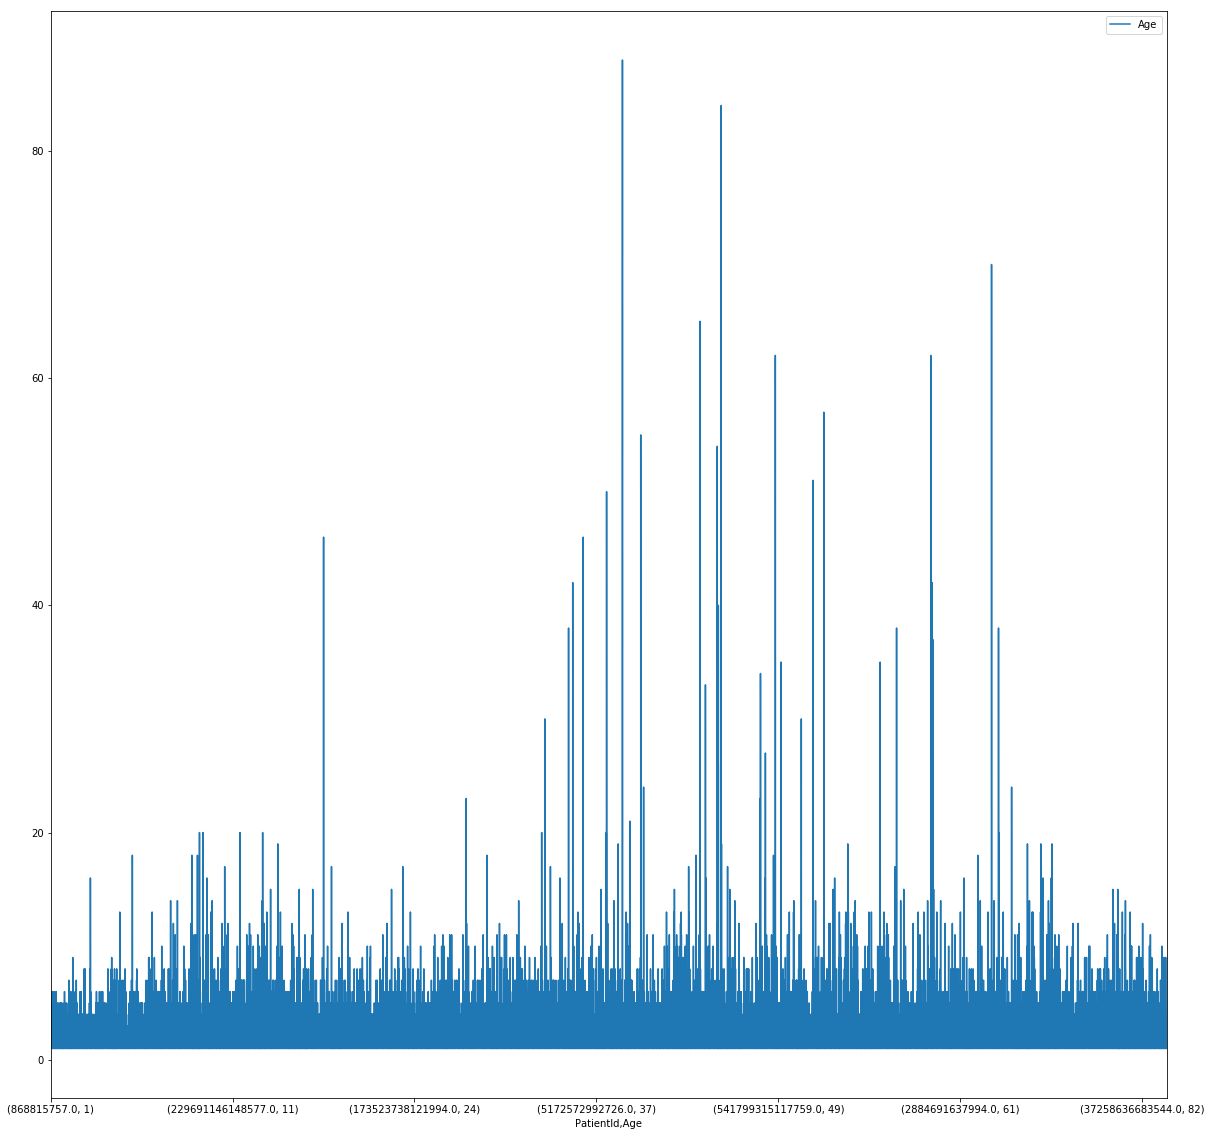

In [81]:

x =df.groupby('PatientId')['Age'].value_counts().sort_values()
x = pd.DataFrame(x).sort_index(level=1)#
x.plot(figsize=(20,20))


In [117]:
patient_list = df.PatientId.unique()
# train 0.75
# test 0.25
size_of_test = round(len(patient_list)*0.25)
size_of_train = round(len(patient_list)*0.75)

import random
patient_train = random.sample(list(patient_list), size_of_train)
patient_test = random.sample(list(patient_list), size_of_test)

train = df[df['PatientId'].isin(patient_train)]
test = df[df['PatientId'].isin(patient_test)]

In [124]:
# test and train are balanced
train['No-show'].value_counts()/len(train['No-show'])
test['No-show'].value_counts()/len(test['No-show'])

0    0.798716
1    0.201284
Name: No-show, dtype: float64